In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
db=pd.read_csv('http://bit.ly/w-data')

In [5]:
db.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
db.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
db.isnull().sum()

Hours     0
Scores    0
dtype: int64

This dataset is clean and does not contain any null values.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

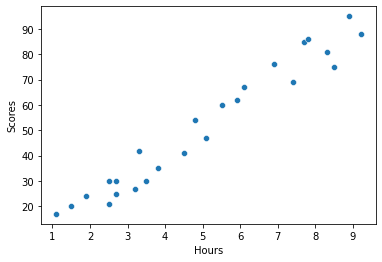

In [14]:
sns.scatterplot(data=db,x='Hours',y='Scores',)

In [19]:
print(db['Hours'].min())
print(db['Hours'].max())

1.1
9.2


The minimum and maximum hours studied by the students are 1.1 and 9.2 respectrively.

In [20]:
print(db['Scores'].min())
print(db['Scores'].max())

17
95


The minimum and maximum score scored by the students are 17 and 95 respectrively.

<AxesSubplot:>

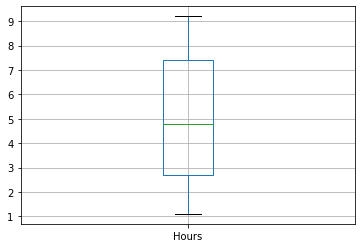

In [21]:
db.boxplot('Hours')

<AxesSubplot:>

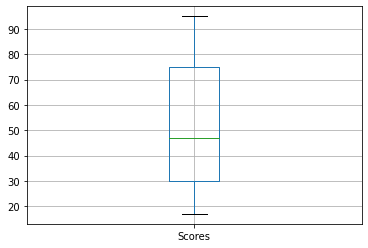

In [22]:
db.boxplot('Scores')

This infers that our data contains no outlier.

In [24]:
db['Hours'].value_counts(bins=5).sort_index()

(1.0910000000000002, 2.72]    7
(2.72, 4.34]                  4
(4.34, 5.96]                  5
(5.96, 7.58]                  3
(7.58, 9.2]                   6
Name: Hours, dtype: int64

In [25]:
db['Scores'].value_counts(bins=5).sort_index()

(16.921, 32.6]    9
(32.6, 48.2]      4
(48.2, 63.8]      3
(63.8, 79.4]      4
(79.4, 95.0]      5
Name: Scores, dtype: int64

This shows that our dataset is normally distributed and we can easily perform liner regression on it

<AxesSubplot:>

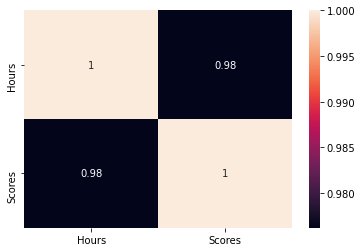

In [29]:
sns.heatmap(db.corr(),annot=True)

This is the correlation matrix which signifies that Hours and Scores are highly related to each other.

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
x=db.iloc[:,:-1].values
y=db.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.60,test_size=0.40,random_state=0)

Here we split our dataset into testing and training data in the ratio of 60:40

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(15, 1)
(10, 1)
(15,)
(10, 1)


In [44]:
from sklearn.linear_model import LinearRegression


In [46]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

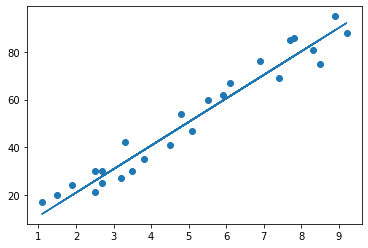

In [47]:
line = model.coef_*x+model.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [48]:
y_pred = model.predict(x_test)
y_pred

array([15.9477618 , 32.77394723, 74.344523  , 25.84551793, 59.49788879,
       38.71260091, 19.90686425, 78.30362545, 69.39564493, 11.98865934])

The above values are the Scores values predicted by our model against our Hours test values.

In [49]:
print('Test Score')
print(model.score(x_test, y_test))
print('Training Score')
print(model.score(x_train, y_train))

Test Score
0.956640847232559
Training Score
0.9440108159733135


This score gives the accuracy of our model which is 95.6%.

In [53]:
output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
print(output.head(5))

   Actual Score  Predicted Score  Residual
0            20        15.947762  4.052238
1            27        32.773947 -5.773947
2            69        74.344523 -5.344523
3            30        25.845518  4.154482
4            62        59.497889  2.502111


What will be predicted score if a student studies for 9.25 hrs/ day?

In [56]:
print('Score of student who studied for 9.25 hours a day:', model.predict([[9.25]]))

Score of student who studied for 9.25 hours a day: [92.65537185]


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

Calculating absolute error:

In [58]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  4.894510863410609


Calculating RMS error:

In [59]:
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean square error :  5.102408224327238


Performing r-test:

In [60]:
metrics.r2_score(y_test,y_pred)

0.956640847232559

Performing t-test:

In [61]:
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> 0.16808369709885795
P-value --> 0.8683916002725192


Performing f-test:

In [62]:
f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.028252129230420545
P-value --> 0.8683916002725187


The dataset given to us two attributes Hours and Scores. This dataset had zero null values.
Our task was to perform liner regression to the dataset and predict the Score of a student against the no.of hours he studied.
This model was successfully developed with an accuracy of 95.6%. 
We also performed evaluation tests on our model. The model has a good R2 value which suggests goodness of the fit.
Thus, the task was successful.